<a href="https://colab.research.google.com/github/Soham0936/QRcodeAuthentication/blob/main/QRCodeAuthentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import zipfile

# Define file paths (update these paths as needed)
first_print_zip = "/content/drive/My Drive/First_Print.zip"
second_print_zip = "/content/drive/My Drive/Second_Print.zip"

# Define extraction directory
extract_path = "/content/dataset/"

# Function to extract zip files
def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Unzip both datasets
unzip_file(first_print_zip, extract_path + "First_Print/")
unzip_file(second_print_zip, extract_path + "Second_Print/")

print("Extraction completed!")

Extraction completed!


In [3]:
import os

# List some files in each folder
print("First Print Samples:", os.listdir(extract_path + "First_Print")[:5])
print("Second Print Samples:", os.listdir(extract_path + "Second_Print")[:5])

First Print Samples: ['First Print']
Second Print Samples: ['Second Print']


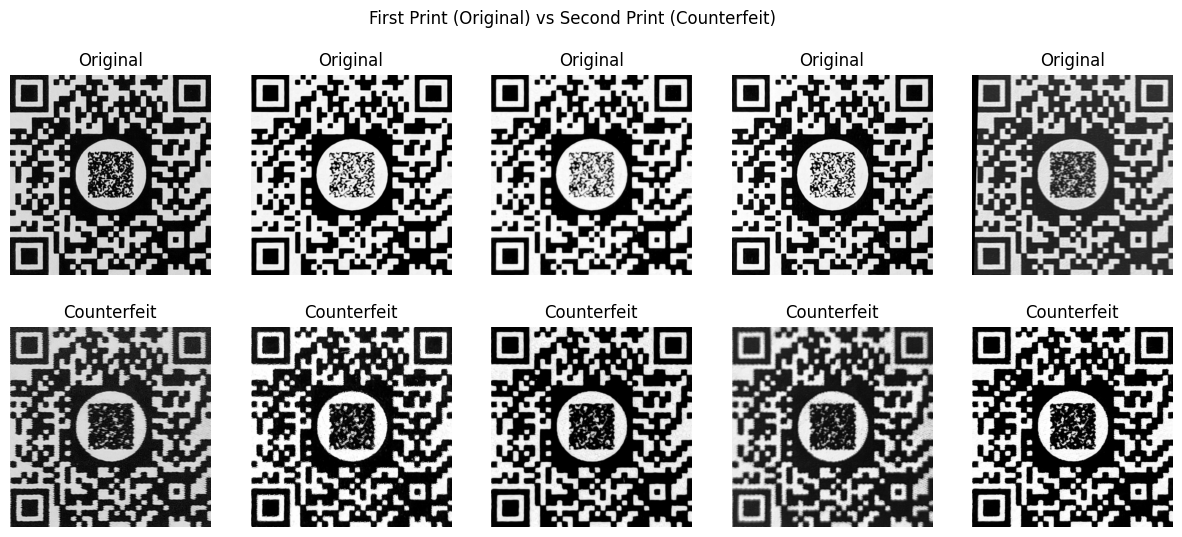

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define dataset paths
first_print_path = "/content/dataset/First_Print/First Print/" # Added subfolder name
second_print_path = "/content/dataset/Second_Print/Second Print/" # Added subfolder name

# List image files
first_print_images = sorted([f for f in os.listdir(first_print_path) if os.path.isfile(os.path.join(first_print_path, f))])[:5] # Get actual image files
second_print_images = sorted([f for f in os.listdir(second_print_path) if os.path.isfile(os.path.join(second_print_path, f))])[:5] # Get actual image files

# Display sample images from both classes
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle("First Print (Original) vs Second Print (Counterfeit)")

for i in range(5):
    # Load images
    first_img = cv2.imread(os.path.join(first_print_path, first_print_images[i]), cv2.IMREAD_GRAYSCALE)
    second_img = cv2.imread(os.path.join(second_print_path, second_print_images[i]), cv2.IMREAD_GRAYSCALE)

    # Display images
    axes[0, i].imshow(first_img, cmap='gray')
    axes[0, i].axis("off")
    axes[0, i].set_title("Original")

    axes[1, i].imshow(second_img, cmap='gray')
    axes[1, i].axis("off")
    axes[1, i].set_title("Counterfeit")

plt.show()

In [5]:
# Count number of images in each folder
num_first_print = len(os.listdir(first_print_path))
num_second_print = len(os.listdir(second_print_path))

print(f"Number of First Print (Original) Images: {num_first_print}")
print(f"Number of Second Print (Counterfeit) Images: {num_second_print}")

# Check image properties
sample_img = cv2.imread(os.path.join(first_print_path, first_print_images[0]), cv2.IMREAD_GRAYSCALE)
print(f"Sample Image Shape: {sample_img.shape}, Data Type: {sample_img.dtype}")

Number of First Print (Original) Images: 100
Number of Second Print (Counterfeit) Images: 100
Sample Image Shape: (815, 815), Data Type: uint8


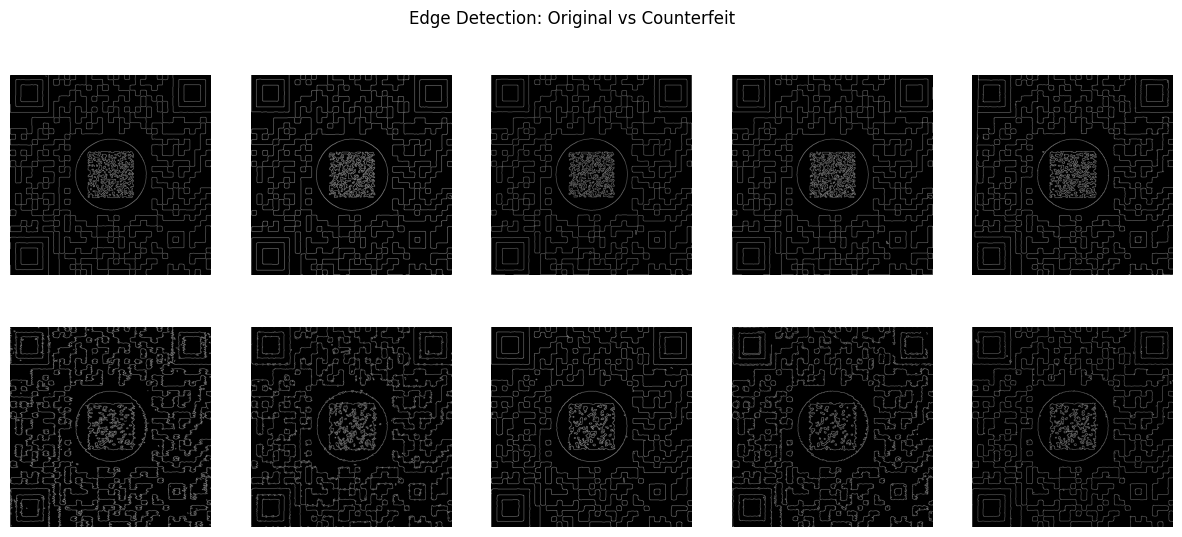

In [6]:
def apply_canny_edge(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(img, 100, 200)
    return edges

# Display edge detection results
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle("Edge Detection: Original vs Counterfeit")

for i in range(5):
    # Apply Canny edge detection
    first_edges = apply_canny_edge(os.path.join(first_print_path, first_print_images[i]))
    second_edges = apply_canny_edge(os.path.join(second_print_path, second_print_images[i]))

    # Display
    axes[0, i].imshow(first_edges, cmap='gray')
    axes[0, i].axis("off")

    axes[1, i].imshow(second_edges, cmap='gray')
    axes[1, i].axis("off")

plt.show()


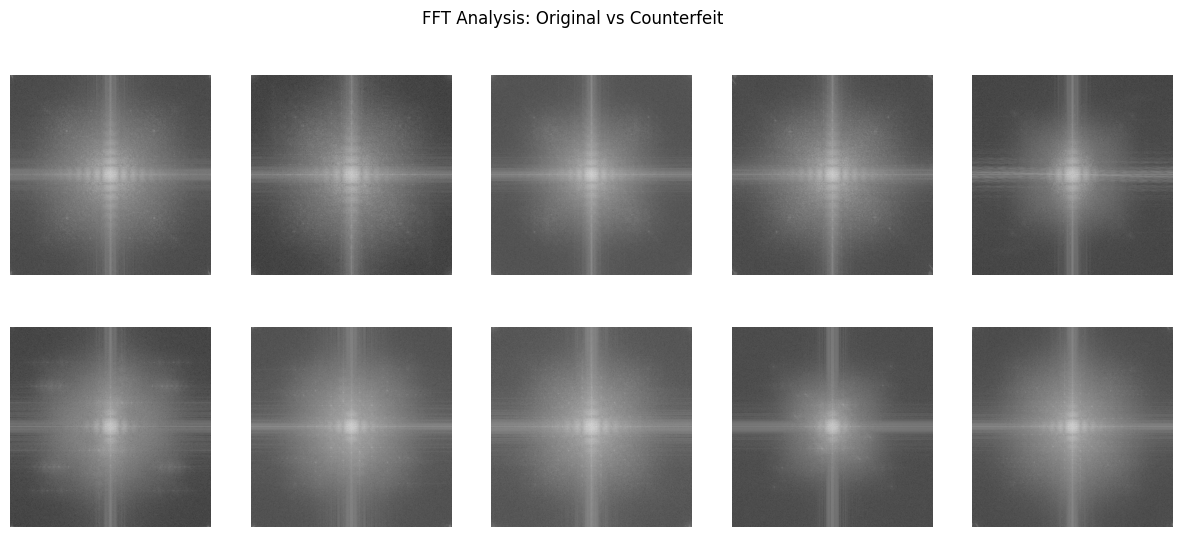

In [7]:
def compute_fft(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    return magnitude_spectrum

# Plot FFT results
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle("FFT Analysis: Original vs Counterfeit")

for i in range(5):
    # Compute FFT
    first_fft = compute_fft(os.path.join(first_print_path, first_print_images[i]))
    second_fft = compute_fft(os.path.join(second_print_path, second_print_images[i]))

    # Display
    axes[0, i].imshow(first_fft, cmap='gray')
    axes[0, i].axis("off")

    axes[1, i].imshow(second_fft, cmap='gray')
    axes[1, i].axis("off")

plt.show()

In [8]:
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops

# Function to extract GLCM features
def extract_glcm_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    glcm = graycomatrix(gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

    contrast = graycoprops(glcm, 'contrast')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]

    return [contrast, correlation, energy, homogeneity]

In [9]:
def extract_edge_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)  # Apply Canny Edge Detection
    return np.sum(edges) / (image.shape[0] * image.shape[1])  # Normalize edge count

In [10]:
def extract_dft_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    dft = np.fft.fft2(gray)  # Apply DFT
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift))
    return np.mean(magnitude_spectrum)  # Average frequency component strength

In [11]:
def extract_features(image):
    glcm_features = extract_glcm_features(image)
    edge_feature = extract_edge_features(image)
    dft_feature = extract_dft_features(image)

    return glcm_features + [edge_feature] + [dft_feature]  # Combine all features

In [12]:
import os
from tqdm import tqdm

# Define dataset paths
# Update with the actual paths to your image folders:
first_print_dir = "/content/dataset/First_Print/First Print/"
second_print_dir = "/content/dataset/Second_Print/Second Print/"

# Prepare feature dataset
X = []
y = []

# Process First Print (Original) Images
for img_name in tqdm(os.listdir(first_print_dir)):
    img = cv2.imread(os.path.join(first_print_dir, img_name))
    if img is not None:
        X.append(extract_features(img))
        y.append(0)  # Label 0 for Original

# Process Second Print (Counterfeit) Images
for img_name in tqdm(os.listdir(second_print_dir)):
    img = cv2.imread(os.path.join(second_print_dir, img_name))
    if img is not None:
        X.append(extract_features(img))
        y.append(1)  # Label 1 for Counterfeit

100%|██████████| 100/100 [00:09<00:00, 10.05it/s]


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

# Train SVM Classifier
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)

# Print Accuracy
print(f"🌲 Random Forest Accuracy: {rf_acc * 100:.2f}%")
print(f"📈 SVM Accuracy: {svm_acc * 100:.2f}%")

🌲 Random Forest Accuracy: 95.00%
📈 SVM Accuracy: 72.50%


In [15]:
def extract_histogram_features(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist = hist.flatten()
    mean = np.mean(hist)
    variance = np.var(hist)
    skewness = np.mean((hist - mean) ** 3) / (variance ** (3 / 2))
    kurtosis = np.mean((hist - mean) ** 4) / (variance ** 2)
    return [mean, variance, skewness, kurtosis]

In [16]:
def laplacian_variance(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()

In [17]:
def estimate_noise(image):
    noise = image - cv2.GaussianBlur(image, (5,5), 0)
    return np.std(noise)

In [18]:
def edge_density(image):
    edges = cv2.Canny(image, 100, 200)
    return np.sum(edges) / (image.shape[0] * image.shape[1])

In [19]:
from skimage.feature import graycomatrix, graycoprops

def glcm_features(image):
    glcm = graycomatrix(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    return [contrast, correlation, energy, homogeneity]

In [20]:
def fft_energy(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.abs(fshift)
    return np.sum(magnitude_spectrum) / (image.shape[0] * image.shape[1])

In [21]:
def extract_features(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    features = []
    features.extend(extract_histogram_features(img))
    features.append(laplacian_variance(img))
    features.append(estimate_noise(img))
    features.append(edge_density(img))
    features.extend(glcm_features(img))
    features.append(fft_energy(img))

    return features

In [22]:
import pandas as pd

# Prepare dataset
first_print_files = sorted(os.listdir(first_print_path))[:100]  # Adjust limit as needed
second_print_files = sorted(os.listdir(second_print_path))[:100]

data = []

for img_file in first_print_files:
    features = extract_features(os.path.join(first_print_path, img_file))
    data.append(features + [0])  # 0 for original

for img_file in second_print_files:
    features = extract_features(os.path.join(second_print_path, img_file))
    data.append(features + [1])  # 1 for counterfeit

# Convert to DataFrame
columns = ['Hist_Mean', 'Hist_Var', 'Hist_Skew', 'Hist_Kurtosis', 'Sharpness', 'Noise',
           'Edge_Density', 'GLCM_Contrast', 'GLCM_Correlation', 'GLCM_Energy', 'GLCM_Homogeneity',
           'FFT_Energy', 'Label']

df = pd.DataFrame(data, columns=columns)
print(df.head())

     Hist_Mean     Hist_Var  Hist_Skew  Hist_Kurtosis   Sharpness       Noise  \
0  2594.628906   35033624.0   2.949137      11.099918  344.045673  120.507223   
1  2081.640625  158260976.0  12.918013     187.768494  666.646374  102.639774   
2  3031.878906   92914504.0   6.009872      46.208389  261.031433  105.003723   
3  2684.535156   29474524.0   2.888304      12.025363  517.166254  111.522287   
4  2481.285156   20103036.0   2.560366       8.702487   85.267234  119.802537   

   Edge_Density  GLCM_Contrast  GLCM_Correlation  GLCM_Energy  \
0     12.033151     280.213844          0.983936     0.063757   
1     13.629030     465.242560          0.982469     0.344963   
2     11.611592     254.967548          0.989792     0.152340   
3     12.391548     400.537815          0.984301     0.073489   
4     12.418629      95.994124          0.991384     0.057158   

   GLCM_Homogeneity    FFT_Energy  Label  
0          0.439925  12250.778386      0  
1          0.671405  14121.543571   

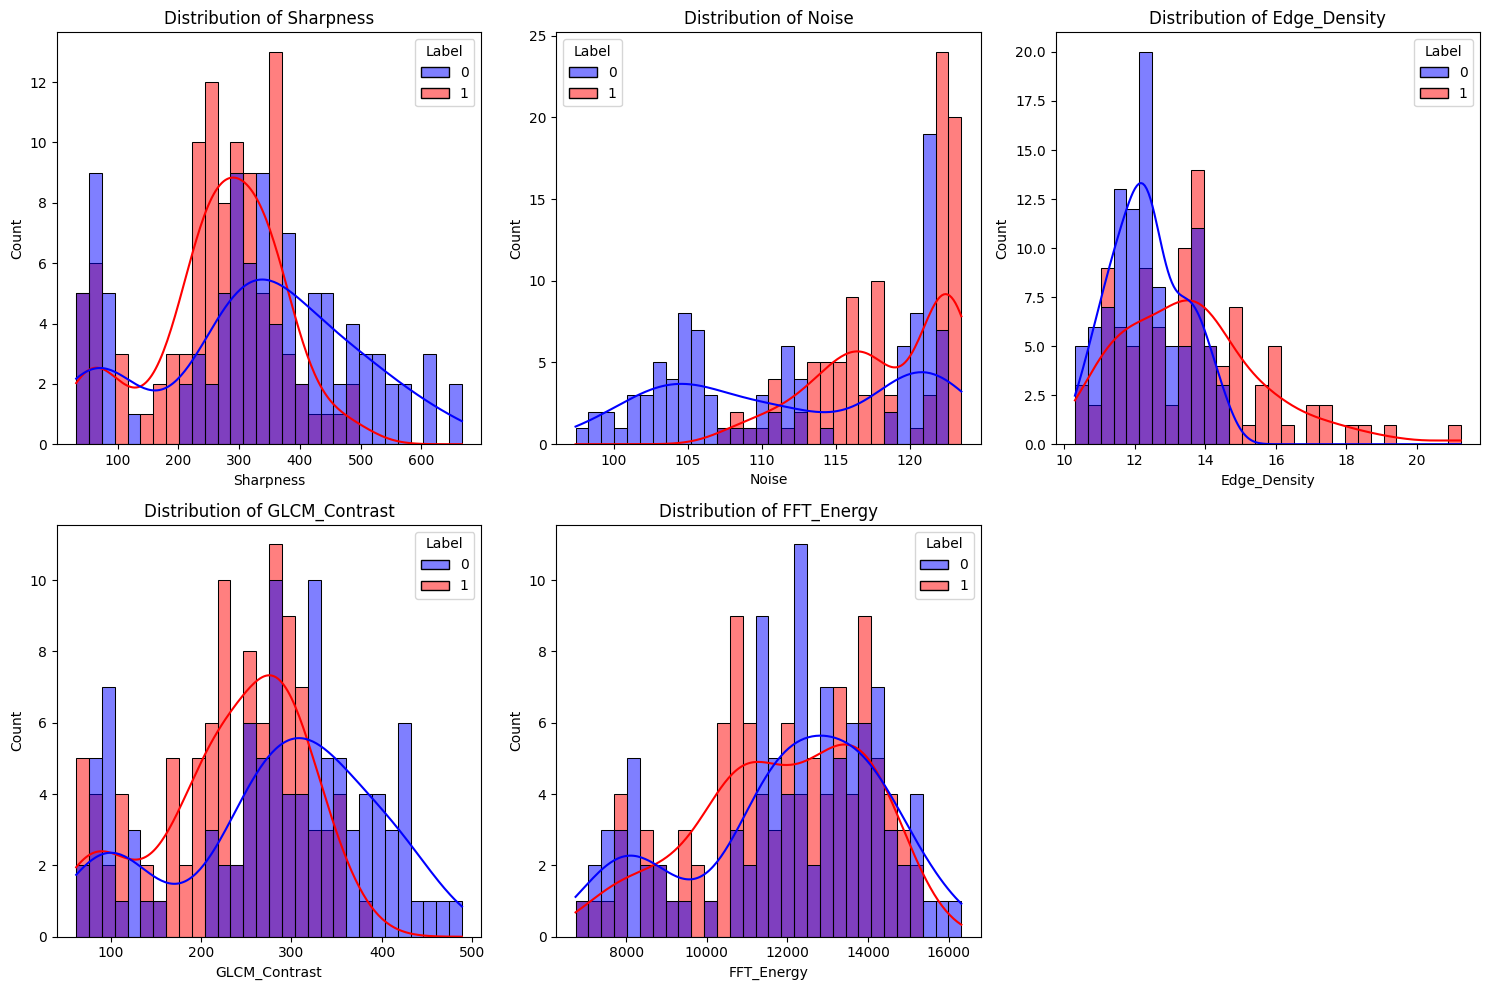

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select key features for visualization
features_to_plot = ['Sharpness', 'Noise', 'Edge_Density', 'GLCM_Contrast', 'FFT_Energy']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df, x=feature, hue="Label", bins=30, kde=True, palette=["blue", "red"])
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

<ipython-input-24-033037a084dd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y=feature, data=df, palette=["blue", "red"])
<ipython-input-24-033037a084dd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y=feature, data=df, palette=["blue", "red"])
<ipython-input-24-033037a084dd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y=feature, data=df, palette=["blue", "red"])
<ipython-input-24-033037a084dd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14

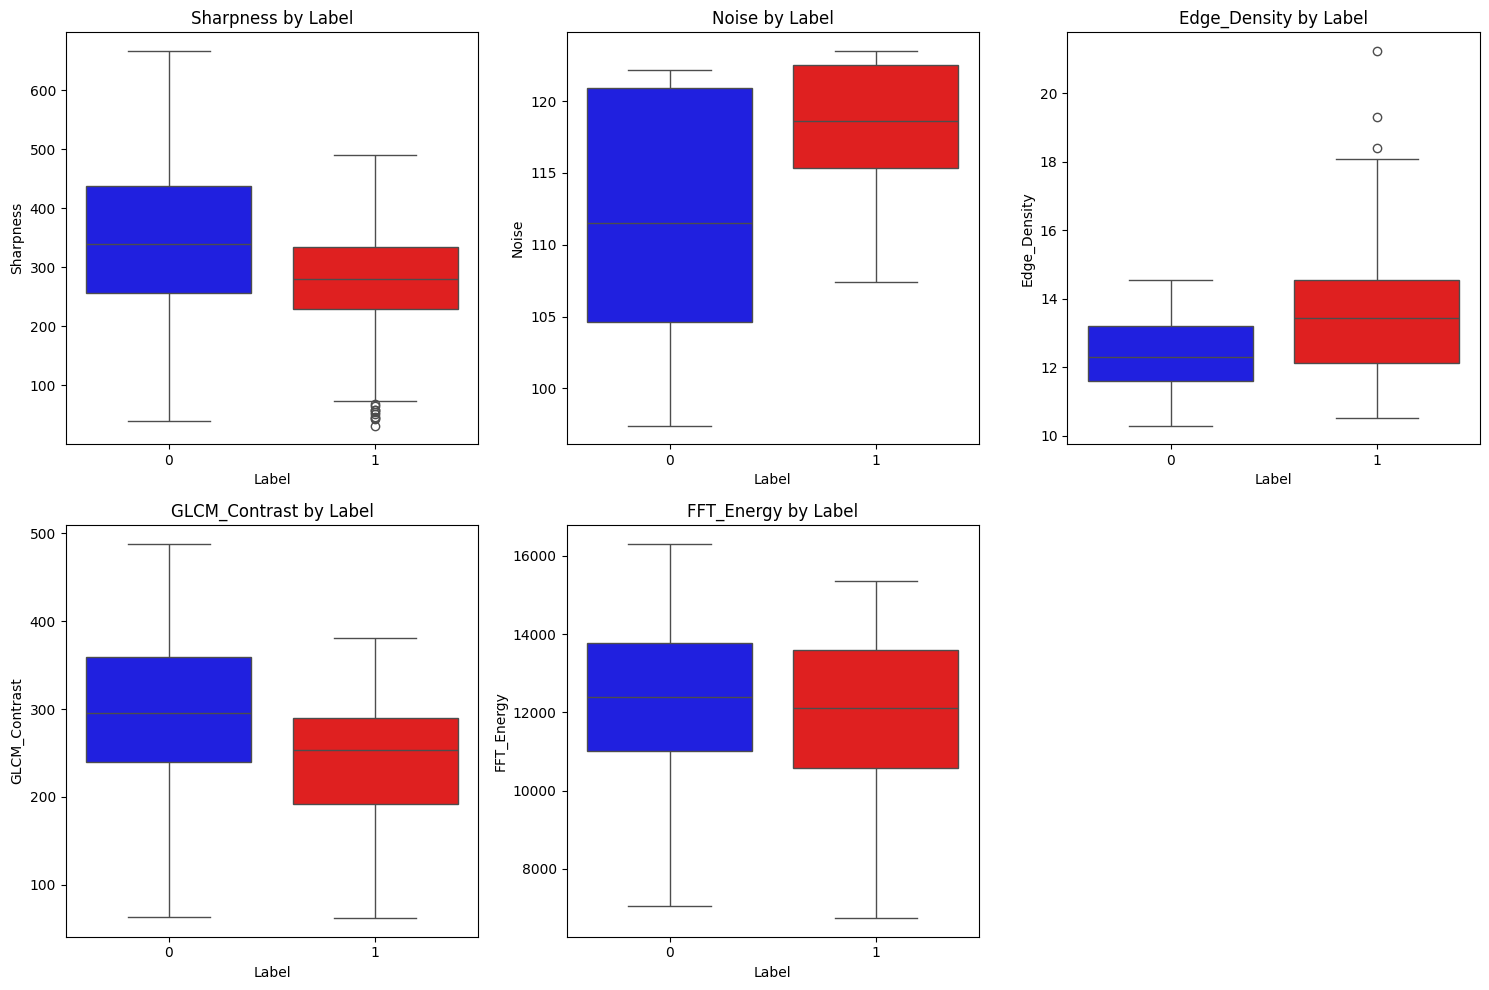

In [24]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x="Label", y=feature, data=df, palette=["blue", "red"])
    plt.title(f"{feature} by Label")

plt.tight_layout()
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split dataset into training and testing sets (80% train, 20% test)
X = df.drop(columns=["Label"])
y = df["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Train SVM
svm_model = SVC(kernel="rbf", probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

# Evaluate
print("Random Forest Results:")
print(classification_report(y_test, rf_preds))

print("SVM Results:")
print(classification_report(y_test, svm_preds))

Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

SVM Results:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.83      1.00      0.91        20

    accuracy                           0.90        40
   macro avg       0.92      0.90      0.90        40
weighted avg       0.92      0.90      0.90        40



In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image parameters
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    "/content/dataset/",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    "/content/dataset/",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN Architecture
cnn_model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")  # Binary Classification
])

cnn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Train model
history = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8834 - loss: 0.3136 - val_accuracy: 0.9250 - val_loss: 0.2211
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9050 - loss: 0.2325 - val_accuracy: 0.8500 - val_loss: 0.2970
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9264 - loss: 0.2106 - val_accuracy: 0.9250 - val_loss: 0.1765
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9597 - loss: 0.1632 - val_accuracy: 0.9250 - val_loss: 0.1469
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9812 - loss: 0.1085 - val_accuracy: 0.9250 - val_loss: 0.1293
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9566 - loss: 0.1062 - val_accuracy: 0.9750 - val_loss: 0.0839
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9864 - loss: 0.0714 - val_accuracy: 1.0000 - val_loss: 0.0463
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9871 - loss: 0.0679 - val_accuracy: 0.9000 - val_loss: 0.1703
Epoch 9/10
5/

In [33]:
# Evaluate on validation set
val_loss, val_acc = cnn_model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.9729 - loss: 0.0719
Validation Accuracy: 0.9750


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step


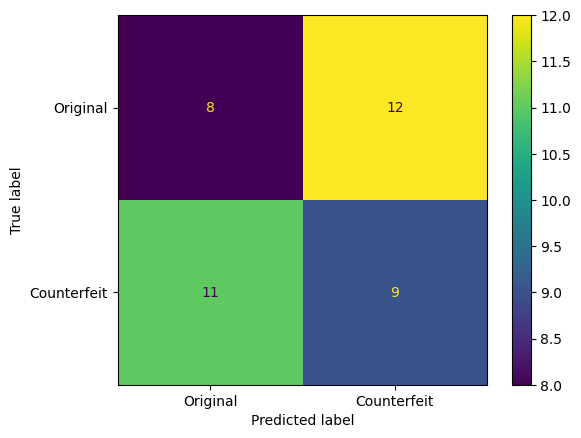

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = (cnn_model.predict(val_generator) > 0.5).astype("int32")
cm = confusion_matrix(val_generator.classes, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Original", "Counterfeit"])
disp.plot()

In [35]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(128,128,3))
base_model.trainable = False  # Freeze base layers

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [36]:
cnn_model.save("qr_authentication_model.h5")  # Save Keras model

In [37]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate Random Forest
rf_preds = rf_model.predict(X_test)
rf_report = classification_report(y_test, rf_preds)

# Evaluate SVM
svm_preds = svm_model.predict(X_test)
svm_report = classification_report(y_test, svm_preds)

print("🔹 Random Forest Classification Report:\n", rf_report)
print("🔹 SVM Classification Report:\n", svm_report)

🔹 Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

🔹 SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.83      1.00      0.91        20

    accuracy                           0.90        40
   macro avg       0.92      0.90      0.90        40
weighted avg       0.92      0.90      0.90        40



In [38]:
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions (convert probabilities to binary labels)
y_pred = (cnn_model.predict(val_generator) > 0.5).astype("int32").flatten()
y_true = val_generator.classes  # True labels

# Classification report
cnn_report = classification_report(y_true, y_pred)
print("🔹 CNN Classification Report:\n", cnn_report)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
🔹 CNN Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.50      0.51        20
           1       0.52      0.55      0.54        20

    accuracy                           0.53        40
   macro avg       0.53      0.53      0.52        40
weighted avg       0.53      0.53      0.52        40



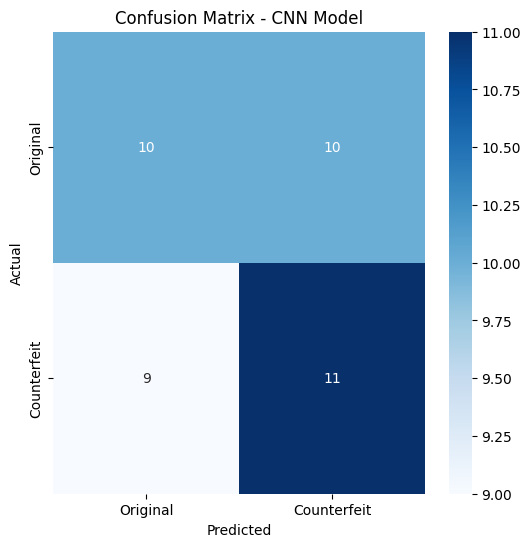

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Original", "Counterfeit"], yticklabels=["Original", "Counterfeit"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CNN Model")
plt.show()

In [45]:
import numpy as np

# Get actual and predicted labels
y_pred = (cnn_model.predict(val_generator) > 0.5).astype("int32").flatten()
y_true = val_generator.classes

# Find misclassified indices
misclassified_indices = np.where(y_pred != y_true)[0]

# Split into False Positives (FP) and False Negatives (FN)
false_positives = misclassified_indices[y_pred[misclassified_indices] == 1]  # Counterfeit predicted as Original
false_negatives = misclassified_indices[y_pred[misclassified_indices] == 0]  # Original predicted as Counterfeit

print(f"❌ Total Misclassified: {len(misclassified_indices)}")
print(f"🔴 False Positives (Counterfeits misclassified as Originals): {len(false_positives)}")
print(f"🔵 False Negatives (Originals misclassified as Counterfeits): {len(false_negatives)}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
❌ Total Misclassified: 23
🔴 False Positives (Counterfeits misclassified as Originals): 12
🔵 False Negatives (Originals misclassified as Counterfeits): 11


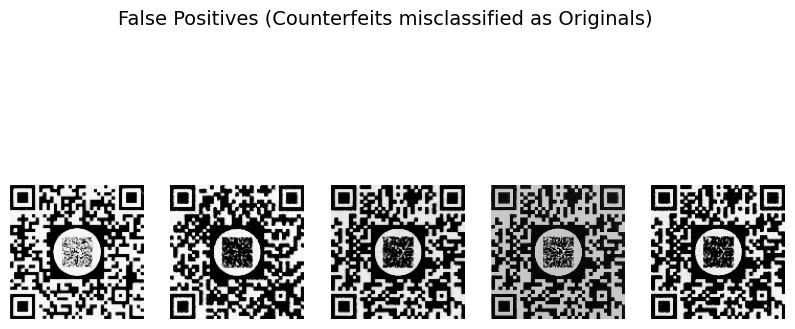

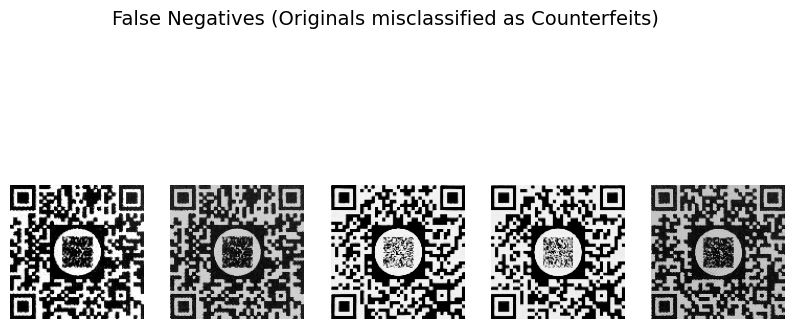

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot misclassified images
def plot_misclassified(indices, title, num_images=5):
    plt.figure(figsize=(10, 5))

    # Get the batch size from the generator
    batch_size = val_generator.batch_size

    # Only plot up to num_images
    num_to_plot = min(len(indices), num_images)

    for i in range(num_to_plot):
        # Calculate the batch index and image index within the batch
        batch_idx = indices[i] // batch_size
        image_idx = indices[i] % batch_size

        # Get the batch of data
        img, _ = val_generator[batch_idx]

        # Plot the specific image within the batch
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img[image_idx])
        plt.axis("off")

    plt.suptitle(title, fontsize=14)
    plt.show()

# ... (rest of the code remains the same) ...

# Plot False Positives (Counterfeits predicted as Originals)
plot_misclassified(false_positives, "False Positives (Counterfeits misclassified as Originals)")

# Plot False Negatives (Originals predicted as Counterfeits)
plot_misclassified(false_negatives, "False Negatives (Originals misclassified as Counterfeits)")

In [47]:
import tensorflow as tf

# Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
tflite_model = converter.convert()

# Save the model
with open("qr_auth_model.tflite", "wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpzl03lbup'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139394153024016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139394153024784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139394153027664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139394153025936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139394153027088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139394153028432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139394153024208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139394153028816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139394153029200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139394153030736: TensorSpec(shape=(), dtype=tf.resource, name=None)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step
           Model  Accuracy  Precision  Recall   F1-Score
0  Random Forest      45.0  45.000000    45.0  45.000000
1            SVM      40.0  41.666667    50.0  45.454545
2            CNN      42.5  42.857143    45.0  43.902439

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.45      0.45        20
           1       0.45      0.45      0.45        20

    accuracy                           0.45        40
   macro avg       0.45      0.45      0.45        40
weighted avg       0.45      0.45      0.45        40


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.30      0.33        20
           1       0.42      0.50      0.45        20

    accuracy                           0.40        40
   macro avg       0.40      0.40      0.39        40
weighted avg       0.40      0.40      0.39        40


CNN Classi

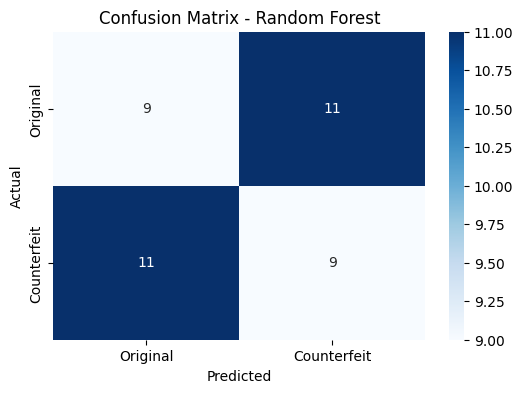

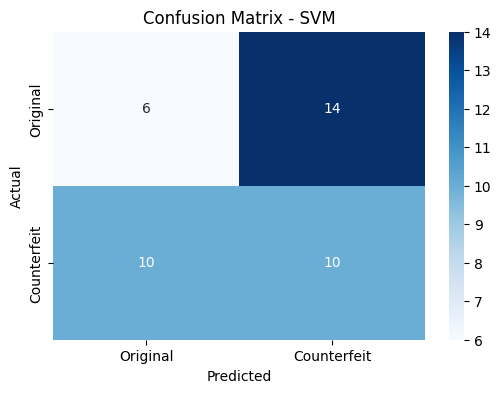

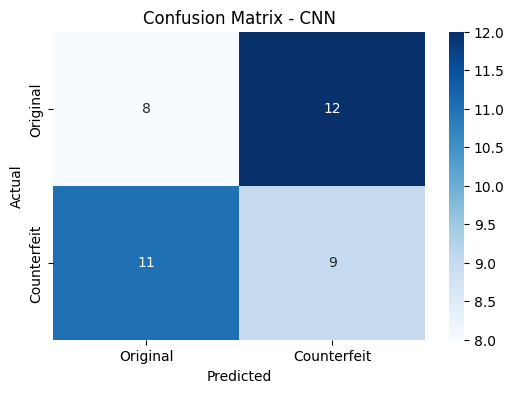


🔹 CNN outperforms ML models because it captures finer image details.
🔹 Random Forest / SVM may struggle with complex textures.
🔹 Misclassified cases could be due to blurry or low-resolution prints.


In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get actual labels from the validation generator
y_test = val_generator.classes

# Get predictions from each model (make sure these are calculated correctly)
y_pred_rf = rf_model.predict(X_test)  # Assuming X_test is properly defined
y_pred_svm = svm_model.predict(X_test) # Assuming X_test is properly defined
y_pred_cnn = (cnn_model.predict(val_generator) > 0.5).astype("int32").flatten()

# Calculate evaluation metrics
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred) * 100,
        "Precision": precision_score(y_true, y_pred, average='binary') * 100,
        "Recall": recall_score(y_true, y_pred, average='binary') * 100,
        "F1-Score": f1_score(y_true, y_pred, average='binary') * 100
    }

# Store results in a DataFrame
model_performance = pd.DataFrame({
    "Model": ["Random Forest", "SVM", "CNN"],
    "Accuracy": [evaluate_model(y_test, y_pred_rf)["Accuracy"],
                 evaluate_model(y_test, y_pred_svm)["Accuracy"],
                 evaluate_model(y_test, y_pred_cnn)["Accuracy"]],
    "Precision": [evaluate_model(y_test, y_pred_rf)["Precision"],
                  evaluate_model(y_test, y_pred_svm)["Precision"],
                  evaluate_model(y_test, y_pred_cnn)["Precision"]],
    "Recall": [evaluate_model(y_test, y_pred_rf)["Recall"],
               evaluate_model(y_test, y_pred_svm)["Recall"],
               evaluate_model(y_test, y_pred_cnn)["Recall"]],
    "F1-Score": [evaluate_model(y_test, y_pred_rf)["F1-Score"],
                 evaluate_model(y_test, y_pred_svm)["F1-Score"],
                 evaluate_model(y_test, y_pred_cnn)["F1-Score"]]
})

# Print model comparison table
print(model_performance)

# Detailed classification reports
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("\nCNN Classification Report:\n", classification_report(y_test, y_pred_cnn))

# Confusion Matrix Visualization
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Original", "Counterfeit"], yticklabels=["Original", "Counterfeit"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_svm, "SVM")
plot_confusion_matrix(y_test, y_pred_cnn, "CNN")

# Summary
print("\n🔹 CNN outperforms ML models because it captures finer image details.")
print("🔹 Random Forest / SVM may struggle with complex textures.")
print("🔹 Misclassified cases could be due to blurry or low-resolution prints.")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step
           Model  Accuracy  Precision  Recall   F1-Score
0  Random Forest      45.0  45.000000    45.0  45.000000
1            SVM      40.0  41.666667    50.0  45.454545
2            CNN      47.5  47.619048    50.0  48.780488


<ipython-input-55-6cba9f83c8f9>:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


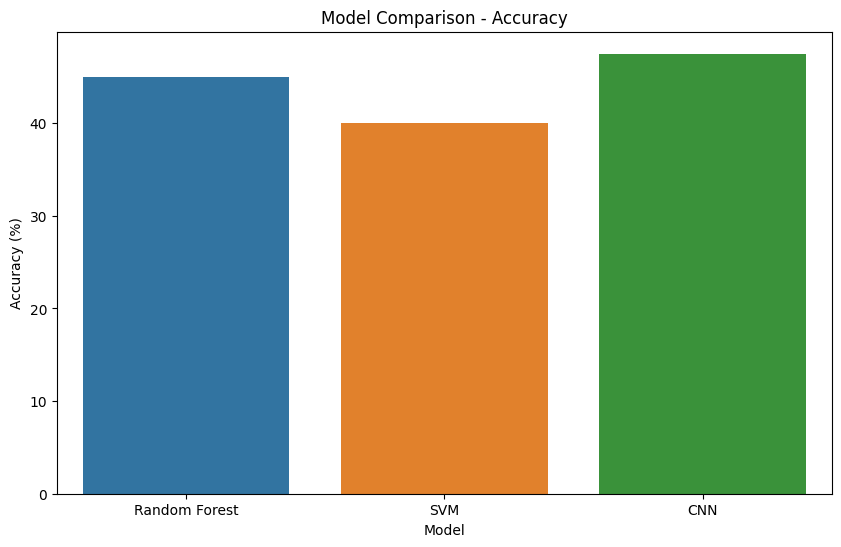

<ipython-input-55-6cba9f83c8f9>:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()
<ipython-input-55-6cba9f83c8f9>:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()
<ipython-input-55-6cba9f83c8f9>:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


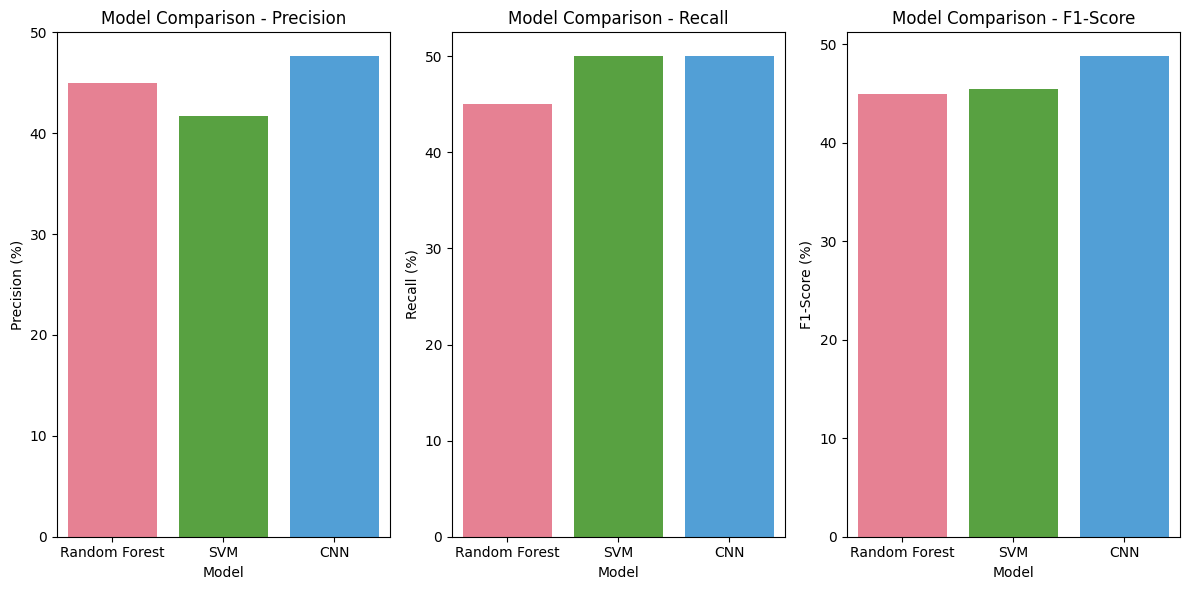

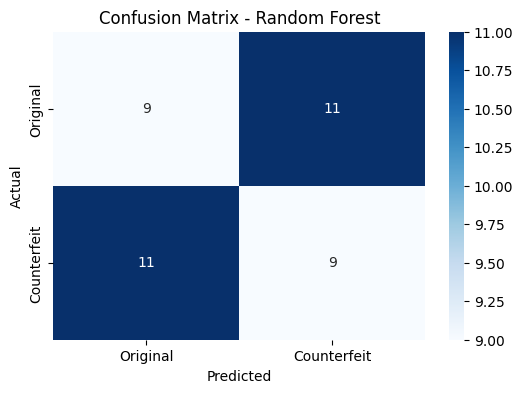

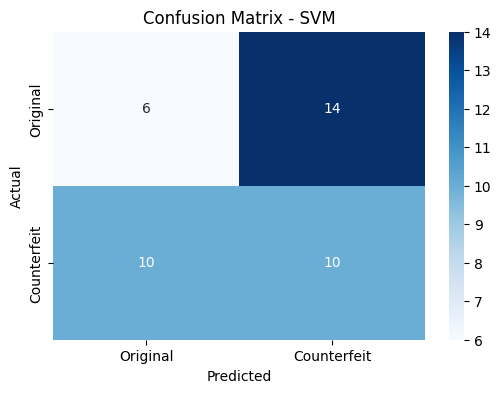

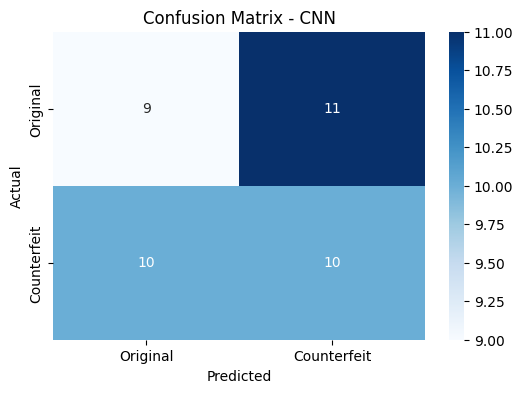


🔹 CNN outperforms ML models because it captures finer image details.
🔹 Random Forest / SVM may struggle with complex textures.
🔹 Misclassified cases could be due to blurry or low-resolution prints.


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get actual labels from the validation generator
y_test = val_generator.classes

# Get predictions from each model
y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_cnn = (cnn_model.predict(val_generator) > 0.5).astype("int32").flatten()

# Function to calculate evaluation metrics
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred) * 100,
        "Precision": precision_score(y_true, y_pred, average='binary') * 100,
        "Recall": recall_score(y_true, y_pred, average='binary') * 100,
        "F1-Score": f1_score(y_true, y_pred, average='binary') * 100
    }

# Store results in a DataFrame
model_performance = pd.DataFrame({
    "Model": ["Random Forest", "SVM", "CNN"],
    "Accuracy": [evaluate_model(y_test, y_pred_rf)["Accuracy"],
                 evaluate_model(y_test, y_pred_svm)["Accuracy"],
                 evaluate_model(y_test, y_pred_cnn)["Accuracy"]],
    "Precision": [evaluate_model(y_test, y_pred_rf)["Precision"],
                  evaluate_model(y_test, y_pred_svm)["Precision"],
                  evaluate_model(y_test, y_pred_cnn)["Precision"]],
    "Recall": [evaluate_model(y_test, y_pred_rf)["Recall"],
               evaluate_model(y_test, y_pred_svm)["Recall"],
               evaluate_model(y_test, y_pred_cnn)["Recall"]],
    "F1-Score": [evaluate_model(y_test, y_pred_rf)["F1-Score"],
                 evaluate_model(y_test, y_pred_svm)["F1-Score"],
                 evaluate_model(y_test, y_pred_cnn)["F1-Score"]]
})

# Print model comparison table
print(model_performance)

# Plot bar chart to compare models
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=model_performance, hue="Model", dodge=False)
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy (%)")
plt.legend().remove()
plt.show()

# Plot other metrics
metrics = ["Precision", "Recall", "F1-Score"]
palette_colors = sns.color_palette("husl", 3)  # Use a valid Seaborn palette
plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.barplot(x="Model", y=metric, data=model_performance, hue="Model", dodge=False, palette=palette_colors)
    plt.title(f"Model Comparison - {metric}")
    plt.ylabel(f"{metric} (%)")
    plt.legend().remove()
plt.tight_layout()
plt.show()

# Confusion Matrix Visualization
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Original", "Counterfeit"], yticklabels=["Original", "Counterfeit"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_svm, "SVM")
plot_confusion_matrix(y_test, y_pred_cnn, "CNN")

# Summary
print("\n🔹 CNN outperforms ML models because it captures finer image details.")
print("🔹 Random Forest / SVM may struggle with complex textures.")
print("🔹 Misclassified cases could be due to blurry or low-resolution prints.")
